In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%pylab inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("/content/drive/MyDrive/analisis datos/datasets/oficina-rescate-denuncias-202001-202109.csv")

In [4]:
df.head()

,fecha_ingreso,hora_ingreso,nro_registro_interno,situacion,origen,es_anonima,tema,subtema,provincia,localidad,dependencia_alta,via_ingreso,derivacion_institucion,derivacion_fecha,derivacion_judicializa,derivacion2_institucion,derivacion2_fecha,derivacion2_judicializa,derivacion3_institucion,derivacion3_fecha,derivacion3_judicializa,denunciante_nacionalidad,denunciante_provincia,denunciante_localidad,denunciante_tipo,denunciante_como_conocio_la_linea,denunciante_genero,denunciante_edad_aparente,provincia_indec_id
0,2020-01-01,20:32,584554505,Urgencia,Ciudadano,No,Trata,Explotación sexual,Buenos Aires,Maquinista Savio,PNR - Línea 145,Línea 145,Protex,2020-01-01 20:27,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denunciante - ciudadano,NaN,Hombre,NaN,6.0
1,2020-01-01,21:06,2584554505,Emergencia,Institución,No,Trata,"Explotación sexual niñas, niños y adolescentes",Buenos Aires,Ciudad Autónoma de Buenos Aires,PNR - Línea 145,Línea 145,Gendarmería Nacional Argentina,2020-01-01 20:52,Si,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,Buenos Aires,Ciudad Autónoma de Buenos Aires,Denunciante - ciudadano,NaN,Mujer,NaN,6.0
2,2020-01-02,01:45,3584554505,Urgencia,Ciudadano,No,Trata,"Extracción forzosa de órganos, tejidos o fluidos",Buenos Aires,San Francisco Solano,PNR - Línea 145,Línea 145,Protex,2020-01-02 01:38,Si,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,Buenos Aires,Claypole,Denunciante - ciudadano,NaN,Mujer,45.0,6.0
3,2020-01-02,16:52,594554505,Urgencia,Ciudadano,Si,Trata,Explotación sexual,Córdoba,Laboulaye,PNR - Línea 145,Línea 145,Protex,2020-06-24 15:13,Si,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,NaN,NaN,Denunciante - ciudadano,Por publicidad en internet,Mujer,50.0,14.0
4,2020-01-02,18:46,1594554505,Urgencia,Ciudadano,No,Trata,Posible captación,NaN,NaN,PNR - Línea 145,Correo Institucional,Protex,2020-06-24 15:14,Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Denunciante - ciudadano,NaN,Hombre,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913 entries, 0 to 2912
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   fecha_ingreso                      2913 non-null   object 
 1   hora_ingreso                       2913 non-null   object 
 2   nro_registro_interno               2913 non-null   int64  
 3   situacion                          2912 non-null   object 
 4   origen                             2913 non-null   object 
 5   es_anonima                         2913 non-null   object 
 6   tema                               2913 non-null   object 
 7   subtema                            2913 non-null   object 
 8   provincia                          2637 non-null   object 
 9   localidad                          2428 non-null   object 
 10  dependencia_alta                   2913 non-null   object 
 11  via_ingreso                        2890 non-null   objec

// pd.to_datetime sirve para convertir los objetos en fechas u hora.

In [6]:
df['fecha_ingreso'] = pd.to_datetime(df['fecha_ingreso'])

In [33]:
df['fecha_ingreso'] = pd.to_datetime(df['fecha_ingreso'], format="%H%M")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913 entries, 0 to 2912
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   fecha_ingreso                      2913 non-null   datetime64[ns]
 1   hora_ingreso                       2913 non-null   object        
 2   nro_registro_interno               2913 non-null   int64         
 3   situacion                          2912 non-null   object        
 4   origen                             2913 non-null   object        
 5   es_anonima                         2913 non-null   object        
 6   tema                               2913 non-null   object        
 7   subtema                            2913 non-null   object        
 8   provincia                          2637 non-null   object        
 9   localidad                          2428 non-null   object        
 10  dependencia_alta                   2

In [9]:
df.columns

Index(['fecha_ingreso', 'hora_ingreso', 'nro_registro_interno', 'situacion',
       'origen', 'es_anonima', 'tema', 'subtema', 'provincia', 'localidad',
       'dependencia_alta', 'via_ingreso', 'derivacion_institucion',
       'derivacion_fecha', 'derivacion_judicializa', 'derivacion2_institucion',
       'derivacion2_fecha', 'derivacion2_judicializa',
       'derivacion3_institucion', 'derivacion3_fecha',
       'derivacion3_judicializa', 'denunciante_nacionalidad',
       'denunciante_provincia', 'denunciante_localidad', 'denunciante_tipo',
       'denunciante_como_conocio_la_linea', 'denunciante_genero',
       'denunciante_edad_aparente', 'provincia_indec_id'],
      dtype='object')

In [10]:
df["hora_ingreso"]

0       20:32
1       21:06
2       01:45
3       16:52
4       18:46
        ...  
2908    23:42
2909    19:24
2910    16:27
2911    19:38
2912    17:56
Name: hora_ingreso, Length: 2913, dtype: object

Se arma tabla con las columnas que voy a usar

In [11]:
datos_llamadas = df.loc[:, ["fecha_ingreso","hora_ingreso", 'origen', 'es_anonima', 'tema', 'subtema', 'provincia', "derivacion_judicializa"]]

In [12]:
datos_llamadas

,fecha_ingreso,hora_ingreso,origen,es_anonima,tema,subtema,provincia,derivacion_judicializa
0,2020-01-01,20:32,Ciudadano,No,Trata,Explotación sexual,Buenos Aires,Si
1,2020-01-01,21:06,Institución,No,Trata,"Explotación sexual niñas, niños y adolescentes",Buenos Aires,Si
2,2020-01-02,01:45,Ciudadano,No,Trata,"Extracción forzosa de órganos, tejidos o fluidos",Buenos Aires,Si
3,2020-01-02,16:52,Ciudadano,Si,Trata,Explotación sexual,Córdoba,Si
4,2020-01-02,18:46,Ciudadano,No,Trata,Posible captación,NaN,Si
...,...,...,...,...,...,...,...,...
2908,2021-08-25,23:42,Ciudadano,No,Trata,Explotación sexual,NaN,No
2909,2021-09-15,19:24,Ciudadano,Si,Trata,Otro,San Juan,No
2910,2021-09-16,16:27,Ciudadano,Si,Trata,Otro,Entre Ríos,Si
2911,2021-09-16,19:38,Ciudadano,Si,Trata,Adultos mayores en riesgo,Tucumán,No


In [13]:
datos_llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2913 entries, 0 to 2912
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha_ingreso           2913 non-null   datetime64[ns]
 1   hora_ingreso            2913 non-null   object        
 2   origen                  2913 non-null   object        
 3   es_anonima              2913 non-null   object        
 4   tema                    2913 non-null   object        
 5   subtema                 2913 non-null   object        
 6   provincia               2637 non-null   object        
 7   derivacion_judicializa  2560 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 182.2+ KB


agregamos columnas para analizar fechas mas especificas

In [14]:
datos_llamadas["año"] = datos_llamadas["fecha_ingreso"].dt.year
datos_llamadas["mes"] = datos_llamadas["fecha_ingreso"].dt.month


In [15]:
datos_llamadas

,fecha_ingreso,hora_ingreso,origen,es_anonima,tema,subtema,provincia,derivacion_judicializa,año,mes
0,2020-01-01,20:32,Ciudadano,No,Trata,Explotación sexual,Buenos Aires,Si,2020,1
1,2020-01-01,21:06,Institución,No,Trata,"Explotación sexual niñas, niños y adolescentes",Buenos Aires,Si,2020,1
2,2020-01-02,01:45,Ciudadano,No,Trata,"Extracción forzosa de órganos, tejidos o fluidos",Buenos Aires,Si,2020,1
3,2020-01-02,16:52,Ciudadano,Si,Trata,Explotación sexual,Córdoba,Si,2020,1
4,2020-01-02,18:46,Ciudadano,No,Trata,Posible captación,NaN,Si,2020,1
...,...,...,...,...,...,...,...,...,...,...
2908,2021-08-25,23:42,Ciudadano,No,Trata,Explotación sexual,NaN,No,2021,8
2909,2021-09-15,19:24,Ciudadano,Si,Trata,Otro,San Juan,No,2021,9
2910,2021-09-16,16:27,Ciudadano,Si,Trata,Otro,Entre Ríos,Si,2021,9
2911,2021-09-16,19:38,Ciudadano,Si,Trata,Adultos mayores en riesgo,Tucumán,No,2021,9


¿Hubo algun dia con mayor cantidad de llamados?

In [16]:
datos_llamadas["fecha_ingreso"].value_counts()

2020-03-23    27
2020-08-04    12
2021-05-20    12
2020-01-09    12
2021-03-15    11
              ..
2020-11-22     1
2020-11-23     1
2020-03-20     1
2020-09-05     1
2021-06-21     1
Name: fecha_ingreso, Length: 617, dtype: int64

Se encuentra una cantidad significativamente elevada de llamados el dia 23 de marzo de 2020, con un total de 27. Los siguientes tres días consiguen una sumatoria de 12 llamados por dia, correspondientes al 4 de agosto de 2020, 20 de mayo de 2021 y 9 de enero de 2020. 

¿De que se hablaba en ese dia?

In [17]:
dia_mas_llamados = datos_llamadas[datos_llamadas["fecha_ingreso"] == "2020-03-23"]

dia_mas_llamados["subtema"].value_counts()



Covid-19                              24
Privacion ilegitima                    1
Privacion ilegitima de la libertad     1
Explotación sexual                     1
Name: subtema, dtype: int64

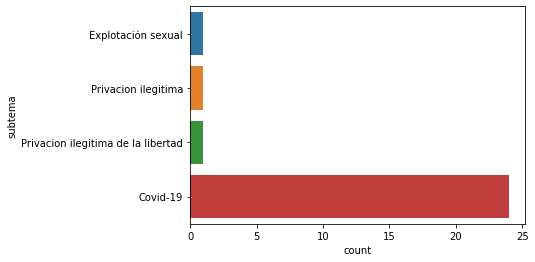

In [18]:
sns.countplot(y=dia_mas_llamados["subtema"])

El subtema principal de llamados recibidos el dia 23/03/2020, es Covid-19. Puede explicarse teniendo en cuenta que fue el primer dia habil de cuarentena obligatoria decretada por el Gobierno Nacional. 

In [19]:
dia_mas_llamados["provincia"].value_counts()

Buenos Aires    26
Mendoza          1
Name: provincia, dtype: int64

Los llamados de ese día provienen de la provincia de Bs As, con excepción de uno que tuvo su origen en Mendoza. 

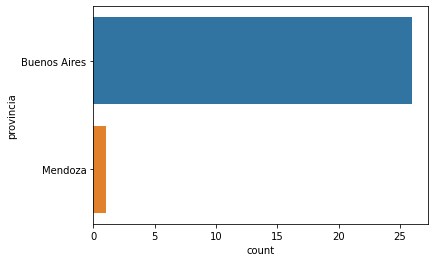

In [20]:
sns.countplot(y=dia_mas_llamados["provincia"])


In [21]:
datos_llamadas["subtema"].unique()

array(['Explotación sexual',
       'Explotación sexual niñas, niños y adolescentes',
       'Extracción forzosa de órganos, tejidos o fluidos',
       'Posible captación', 'Persona desaparecida', 'Explotación laboral',
       'Oferta laboral engañosa', 'Venta de niños y otros delitos',
       'Pornografía infantil, venta de niños y otros delitos, estafa',
       'Explotación sexual, explotación sexual niñas, niños y adolescentes',
       'Persona desaparecida, venta de niños y otros delitos',
       'Abuso sexual infantil', 'Persona desaparecida, posible captación',
       'Oferta laboral engañosa, posible captación',
       'Publicidad de oferta sexual',
       'Explotación laboral, explotación laboral niñas, niños y adolescentes',
       'Pornografía infantil', 'Otro',
       'Explotación sexual, pornografía infantil',
       'Explotación laboral niñas, niños y adolescentes',
       'Explotación laboral, explotación sexual',
       'Privación ilegítima de la libertad',
       'Explo

Subtema Covid fue un tema recurrente en los llamados?

In [22]:
subtema_covid = datos_llamadas[datos_llamadas["subtema"] == "Covid-19"]

subtema_covid["fecha_ingreso"].value_counts()

2020-03-23    24
2020-03-24     5
2020-04-20     1
2020-03-30     1
Name: fecha_ingreso, dtype: int64

¿Cual es el subtema que recibió más llamados?

In [23]:
datos_llamadas["subtema"].value_counts()

Explotación sexual                                                                                                 1087
Explotación laboral                                                                                                 426
Posible captación                                                                                                   256
Explotación sexual niñas, niños y adolescentes                                                                      211
Persona desaparecida                                                                                                204
                                                                                                                   ... 
Explotación sexual, posible captación, reducción a la servidumbre o situaciones análogas, servidumbre doméstica       1
Explotación laboral, explotación sexual                                                                               1
Pornografia                             

¿Las llamadas son anonimas?

In [24]:
datos_llamadas["es_anonima"].value_counts()

No    1689
Si    1224
Name: es_anonima, dtype: int64

¿Que cantidad de llamadas logran judicializarse?

In [26]:
datos_llamadas["derivacion_judicializa"].value_counts()

Si    1857
No     703
Name: derivacion_judicializa, dtype: int64

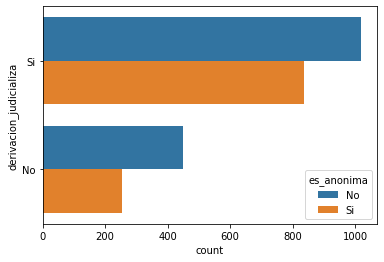

In [27]:
sns.countplot(y=datos_llamadas["derivacion_judicializa"], hue = datos_llamadas["es_anonima"])

Ingreso de llamadas según año y mes. 



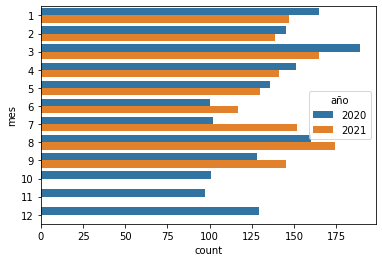

In [28]:
sns.countplot(y=datos_llamadas["mes"], hue = datos_llamadas["año"])

In [29]:
datos_llamadas["año"].value_counts()

2020    1603
2021    1310
Name: año, dtype: int64

In [30]:
agrupada_año = datos_llamadas.groupby("año")

In [31]:
agrupada_año["mes" ].value_counts()

año   mes
2020  3      189
      1      165
      8      160
      4      151
      2      145
      5      136
      12     129
      9      128
      7      102
      10     101
      6      100
      11      97
2021  8      174
      3      165
      7      152
      1      147
      9      145
      4      141
      2      139
      5      130
      6      117
Name: mes, dtype: int64

Cantidad de llamadas por provincia segun el año. 

In [41]:
agrupada_año["provincia" ].value_counts()

año   provincia                      
2020  Buenos Aires                       764
      Córdoba                            115
      Santa Fe                            85
      Ciudad Autónoma de Buenos Aires     76
      Mendoza                             75
      Neuquén                             47
      Tucumán                             43
      Misiones                            38
      Salta                               38
      Corrientes                          36
      Río Negro                           28
      Chubut                              22
      Jujuy                               22
      Santiago del Estero                 19
      Entre Ríos                          17
      Chaco                               14
      San Luis                            13
      Catamarca                           10
      Formosa                              7
      San Juan                             6
      Santa Cruz                           6
      La Rioja   

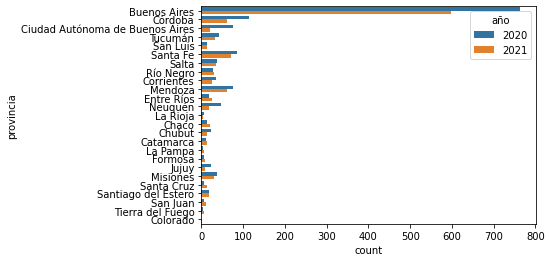

In [50]:
sns.countplot(y=datos_llamadas["provincia"], hue = datos_llamadas["año"])